In [41]:
import numpy as np
from collections import namedtuple

a = 1.332545342543623
print(a)
print(np.round(a, 4))
print(np.float64(a))
print(np.round(np.float64(a), 4))
b = np.round(a, 4)

Rule = namedtuple('Rule', ['multiplier', 'round'])
CONVERTER = {
    'open': Rule(1, 4),
    'close': Rule(1, 4),
    'high': Rule(1, 4),
    'low': Rule(1, 4),
    'limit_up': Rule(1, 4),
    'limit_down': Rule(1, 4),
}

CONVERTER['limit_up'].round

1.2
1.2
1.2
1.2


4

[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
[  1.00000000e+00   1.11000000e+02   4.21000000e+02   9.31000000e+02
   1.64100000e+03   2.55100000e+03   3.66100000e+03   4.97100000e+03
   6.48100000e+03   8.19100000e+03   1.01010000e+04]


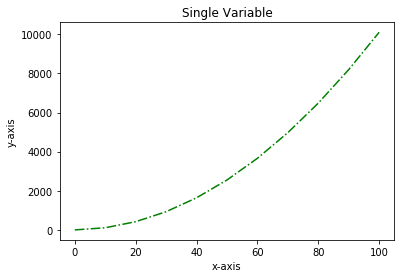

In [26]:
import numpy as np
from matplotlib import pyplot as plt

x = np.linspace(0, 100, 11)
print(x)

y = x * x + x + 1
print(y)

plt.figure()
plt.title('Single Variable')
plt.xlabel('x-axis') # x轴文本
plt.ylabel('y-axis') # y轴文本
plt.grid(False) # 是否绘制网格线
plt.plot(x, y, 'g-.') # 绘制y=2x图像，颜色green，形式为线条
plt.show() # 展示图像

In [7]:
import numpy as np

a = np.array([[1, 1, 1, 1], [2, 2, 2, 2]])
b = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4]])
a.dot(b)

array([[10, 10, 10],
       [20, 20, 20]])

Epoch: 0050 cost= 14630.010742188 W= 73.0025 b= -19.2038
Epoch: 0100 cost= 13212.333007812 W= 76.6818 b= -46.0055
Epoch: 0150 cost= 12069.348632812 W= 79.9914 b= -70.1139
Epoch: 0200 cost= 11148.226562500 W= 82.9684 b= -91.7997
Epoch: 0250 cost= 10406.224609375 W= 85.6463 b= -111.307
Epoch: 0300 cost= 9808.836914062 W= 88.0551 b= -128.853
Epoch: 0350 cost= 9328.158203125 W= 90.2218 b= -144.637
Epoch: 0400 cost= 8941.637695312 W= 92.1708 b= -158.834
Epoch: 0450 cost= 8631.065429688 W= 93.924 b= -171.605
Epoch: 0500 cost= 8381.729492188 W= 95.501 b= -183.093
Epoch: 0550 cost= 8181.735839844 W= 96.9195 b= -193.426
Epoch: 0600 cost= 8021.496093750 W= 98.1956 b= -202.721
Epoch: 0650 cost= 7893.264160156 W= 99.3434 b= -211.082
Epoch: 0700 cost= 7790.785156250 W= 100.376 b= -218.603
Epoch: 0750 cost= 7709.018066406 W= 101.305 b= -225.368
Epoch: 0800 cost= 7643.891601562 W= 102.14 b= -231.453
Epoch: 0850 cost= 7592.127441406 W= 102.891 b= -236.927
Epoch: 0900 cost= 7551.079101562 W= 103.567 b=

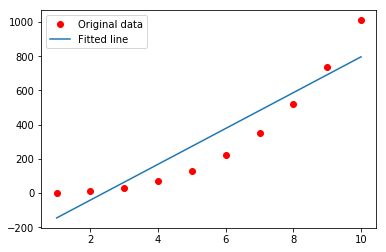

Testing... (Mean square loss Comparison)
Testing cost= 101162.0
Absolute mean square loss difference: 93669.4


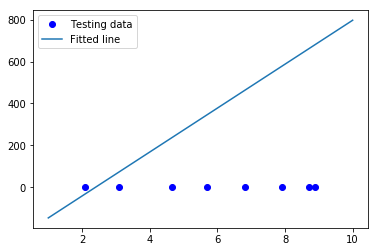

In [26]:
'''
A linear regression learning algorithm example using TensorFlow library.
Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''

from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
# train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
#                          7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
#                          2.827,3.465,1.65,2.904,2.42,2.94,1.3])
train_X = x = np.linspace(1, 10, 10)
train_Y = x * x * x + x + 1

n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()